In [2]:
import pommerman
from pommerman import agents
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
from collections import Counter

## FFA 1 simple 3 random

In [3]:
agent_list = [
    agents.SimpleAgent(), 
    agents.RandomAgent(), 
    agents.RandomAgent(), 
    agents.RandomAgent(),
]

env = pommerman.make('PommeFFACompetition-v0', agent_list)

D:\Users\Baby-\Anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [4]:

observations = [[], 
                [], 
                [], 
                []]
actions = [[], 
           [], 
           [], 
           []]

rewards = [[], 
           [], 
           [], 
           []]

time_step = []

# From OpenAI Gym
for i in tqdm(range(10000)):
    obs = env.reset()
    done = False
    reward = [0, 0, 0, 0]
    t = 0
    while not done:
        action = env.act(obs)
        new_obs, new_reward, done, _ = env.step(action)
        for j in range(4):
            if reward[j] == 0:
                actions[j].append(action[j])
                rewards[j].append(new_reward[j])
        obs = deepcopy(new_obs)
        reward = deepcopy(new_reward)
        t += 1
        if (10 not in obs[0]["alive"]):
            done = True
    time_step.append(t)
    if (1 in reward):
        winner = reward.index(1)
    else:
        winner = None
env.close()


In [6]:
episode_length = time_step 
cnt = Counter(episode_length)
print("The minimum episode length is: {}".format(np.min(episode_length)))
print("The median episode length is: {}".format(np.median(episode_length)))
print("The mean episode length is: {}".format(np.mean(episode_length)))
print("The max episode length is: {}".format(np.max(episode_length)))
print("The most common episode is: {}".format(cnt.most_common(1)[0][0]))
print("Number of episodes smaller than {} is {}".format(35, np.sum(np.array(episode_length) < 35)))

The minimum episode length is: 10
The median episode length is: 31.0
The mean episode length is: 34.5796
The max episode length is: 183
The most common episode is: 23
Number of episodes smaller than 35 is 5970


In [8]:
print("The minimum episode count is: {}".format(episode_length.count(np.min(episode_length))))
print("The median episode count is: {}".format(episode_length.count(np.median(episode_length))))
print("The max episode count is: {}".format(episode_length.count(np.max(episode_length))))
print("The most common episode count is: {}".format(cnt.most_common(1)[0][1]))
print("Number of episodes smaller than mean {} is {}".format(np.mean(episode_length), np.sum(np.array(episode_length) < np.mean(episode_length))))

The minimum episode count is: 95
The median episode count is: 259
The max episode count is: 1
The most common episode count is: 313
Number of episodes smaller than mean 34.5796 is 5970


In [9]:
print("Reward value for agent 0 is {}".format(np.sum(rewards[0])/10000))

Reward value for agent 0 is 0.9518


In [10]:
actions_count = np.zeros(6)
for action in actions[0]:
    actions_count[action] += 1

In [11]:
actions_count

array([129680.,  40515.,  49923.,  42435.,  49994.,  33249.])

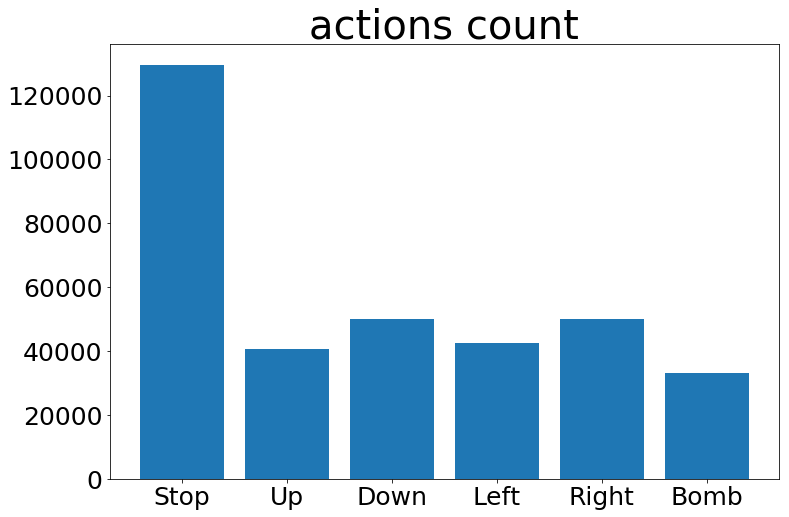

In [12]:
fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 25})

#plt.figure(figsize=(17,10))
plt.bar(range(0,6), actions_count)

plt.xticks(np.arange(6), ('Stop','Up','Down','Left','Right','Bomb'))
plt.title('actions count', fontsize=40)
plt.savefig('rand10kactions.png', dpi=fig.dpi)

plt.show()

## FFA 1 simple, 1 simple and 2 random

In [3]:
# Create a set of agents (exactly four)
agent_list = [
    agents.SimpleAgent(),
    agents.RandomAgent(),
    agents.SimpleAgent(),
    agents.RandomAgent(),
]


# Make the "Free-For-All" environment using the agent list
env = pommerman.make('PommeFFACompetition-v0', agent_list)

In [4]:

observations = [[], 
                [], 
                [], 
                []]
actions = [[], 
           [], 
           [], 
           []]

rewards = [[], 
           [], 
           [], 
           []]

time_step = []

# From OpenAI Gym
for i in tqdm(range(10000)):
    obs = env.reset()
    done = False
    reward = [0, 0, 0, 0]
    t = 0
    while not done:
        action = env.act(obs)
        new_obs, new_reward, done, _ = env.step(action)
        for j in range(4):
            if reward[j] == 0:
                actions[j].append(action[j])
                rewards[j].append(new_reward[j])
        obs = deepcopy(new_obs)
        reward = deepcopy(new_reward)
        t += 1
        if (10 not in obs[0]["alive"]):
            done = True
    time_step.append(t)
    if (1 in reward):
        winner = reward.index(1)
    else:
        winner = None
env.close()


In [5]:
episode_length = time_step 
cnt = Counter(episode_length)
print("The minimum episode length is: {}".format(np.min(episode_length)))
print("The median episode length is: {}".format(np.median(episode_length)))
print("The mean episode length is: {}".format(np.mean(episode_length)))
print("The max episode length is: {}".format(np.max(episode_length)))
print("The most common episode is: {}".format(cnt.most_common(1)[0][0]))
print("Number of episodes smaller than {} is {}".format(35, np.sum(np.array(episode_length) < 35)))

The minimum episode length is: 10
The median episode length is: 167.0
The mean episode length is: 250.8105
The max episode length is: 801
The most common episode is: 801
Number of episodes smaller than 35 is 343


In [6]:
print("The minimum episode count is: {}".format(episode_length.count(np.min(episode_length))))
print("The median episode count is: {}".format(episode_length.count(np.median(episode_length))))
print("The max episode count is: {}".format(episode_length.count(np.max(episode_length))))
print("The most common episode count is: {}".format(cnt.most_common(1)[0][1]))
print("Number of episodes smaller than mean {} is {}".format(np.mean(episode_length), np.sum(np.array(episode_length) < np.mean(episode_length))))

The minimum episode count is: 89
The median episode count is: 26
The max episode count is: 599
The most common episode count is: 599
Number of episodes smaller than mean 250.8105 is 6635


In [7]:
print("Reward value for agent 0 is {}".format(np.sum(rewards[0])/10000))

Reward value for agent 0 is -0.1544


In [12]:
actions_count = np.zeros(6)
for action in actions[0]:
    actions_count[action] += 1

In [13]:
actions_count

array([368968., 468668., 530076., 468664., 547943., 123786.])

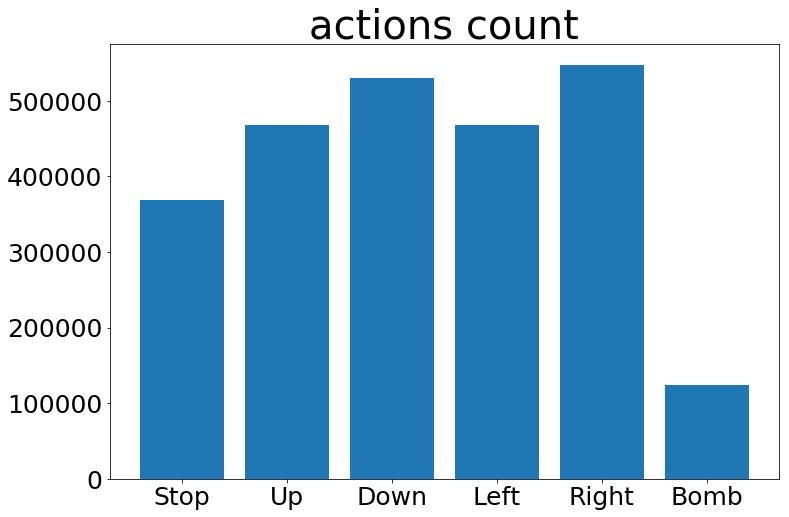

In [14]:
fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 25})

#plt.figure(figsize=(17,10))
plt.bar(range(0,6), actions_count)

plt.xticks(np.arange(6), ('Stop','Up','Down','Left','Right','Bomb'))
plt.title('actions count', fontsize=40)
plt.savefig('rand10kactions.png', dpi=fig.dpi)

plt.show()

## FFA 4 Simple

In [13]:
# Create a set of agents (exactly four)
    agent_list = [
        agents.SimpleAgent(),
        agents.SimpleAgent(),
        agents.SimpleAgent(),
        agents.SimpleAgent(),
    ]

    # Make the "Free-For-All" environment using the agent list
    env = pommerman.make('PommeFFACompetition-v0', agent_list)

In [14]:

observations = [[], 
                [], 
                [], 
                []]
actions = [[], 
           [], 
           [], 
           []]

rewards = [[], 
           [], 
           [], 
           []]

time_step = []

# From OpenAI Gym
for i in tqdm(range(10000)):
    obs = env.reset()
    done = False
    reward = [0, 0, 0, 0]
    t = 0
    while not done:
        action = env.act(obs)
        new_obs, new_reward, done, _ = env.step(action)
        for j in range(4):
            if reward[j] == 0:
                actions[j].append(action[j])
                rewards[j].append(new_reward[j])
        obs = deepcopy(new_obs)
        reward = deepcopy(new_reward)
        t += 1
        if (10 not in obs[0]["alive"]):
            done = True
    time_step.append(t)
    if (1 in reward):
        winner = reward.index(1)
    else:
        winner = None
env.close()


In [15]:
episode_length = time_step 
cnt = Counter(episode_length)
print("The minimum episode length is: {}".format(np.min(episode_length)))
print("The median episode length is: {}".format(np.median(episode_length)))
print("The mean episode length is: {}".format(np.mean(episode_length)))
print("The max episode length is: {}".format(np.max(episode_length)))
print("The most common episode is: {}".format(cnt.most_common(1)[0][0]))
print("Number of episodes smaller than {} is {}".format(35, np.sum(np.array(episode_length) < 35)))

The minimum episode length is: 10
The median episode length is: 184.0
The mean episode length is: 267.728
The max episode length is: 801
The most common episode is: 801
Number of episodes smaller than 35 is 213


In [16]:
print("The minimum episode count is: {}".format(episode_length.count(np.min(episode_length))))
print("The median episode count is: {}".format(episode_length.count(np.median(episode_length))))
print("The max episode count is: {}".format(episode_length.count(np.max(episode_length))))
print("The most common episode count is: {}".format(cnt.most_common(1)[0][1]))
print("Number of episodes smaller than {} is {}".format(np.mean(episode_length), np.sum(np.array(episode_length) < np.mean(episode_length))))

The minimum episode count is: 85
The median episode count is: 31
The max episode count is: 638
The most common episode count is: 638
Number of episodes smaller than 267.728 is 6446


In [17]:
print("Reward value for agent 0 is {}".format(np.sum(rewards[0])/10000))

Reward value for agent 0 is -0.5486


In [18]:
actions_count = np.zeros(6)
for action in actions[0]:
    actions_count[action] += 1

In [19]:
actions_count

array([364500., 518445., 572591., 521393., 587000., 113351.])

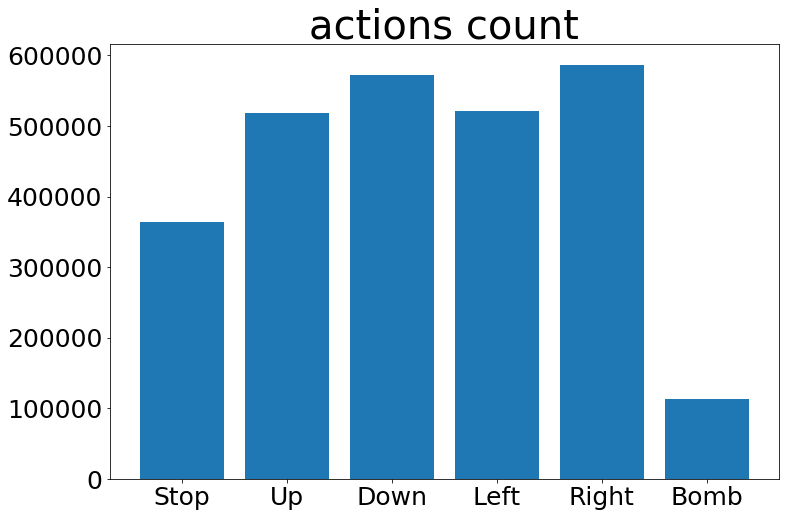

In [20]:
fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 25})

#plt.figure(figsize=(17,10))
plt.bar(range(0,6), actions_count)

plt.xticks(np.arange(6), ('Stop','Up','Down','Left','Right','Bomb'))
plt.title('actions count', fontsize=40)
plt.savefig('rand10kactions.png', dpi=fig.dpi)

plt.show()

## COOP

In [21]:
# Create a set of agents (exactly four)
    agent_list = [
        agents.SimpleAgent(),
        agents.SimpleAgent(),
        agents.SimpleAgent(),
        agents.SimpleAgent(),
    ]

    # Make the "Free-For-All" environment using the agent list
    env = pommerman.make('PommeTeamCompetition-v0', agent_list)

In [22]:
if __name__ == '__main__':

    observations = [[], [], [], []]
    actions = [[], [], [], []]
    rewards = [[], [], [], []]
    time_step = []

    # Run the episodes just like OpenAI Gym
    for i in tqdm(range(10000)):
        obs = env.reset()
        done = False
        reward = [0, 0, 0, 0]
        t = 0
        while not done:
            action = env.act(obs)
            new_obs, new_reward, done, info = env.step(action)
            for j in range(4):
                if reward[j] == 0:
                    actions[j].append(action[j])
                    rewards[j].append(new_reward[j])
            obs = deepcopy(new_obs)
            reward = deepcopy(new_reward)
            t += 1
            # if (i % 100 == 0):
                # print(obs[0]["alive"])
            if (10 not in obs[0]["alive"]):
                done = True
            #if done:
                #print("Game Done")
        time_step.append(t)
        if (1 in reward):
            winner = reward.index(1)
        else:
            winner = None
        # if (i % 100 == 0):
            # print("Episode:", i + 1, ", Max length:", t, ", Winner: Agent", winner,", Rewards:", reward)
    env.close()


In [23]:
episode_length = time_step 
cnt = Counter(episode_length)
print("The minimum episode length is: {}".format(np.min(episode_length)))
print("The median episode length is: {}".format(np.median(episode_length)))
print("The mean episode length is: {}".format(np.mean(episode_length)))
print("The max episode length is: {}".format(np.max(episode_length)))
print("The most common episode is: {}".format(cnt.most_common(1)[0][0]))
print("Number of episodes smaller than {} is {}".format(35, np.sum(np.array(episode_length) < 35)))

The minimum episode length is: 10
The median episode length is: 151.0
The mean episode length is: 224.3779
The max episode length is: 801
The most common episode is: 11
Number of episodes smaller than 35 is 1288


In [24]:
print("The minimum episode count is: {}".format(episode_length.count(np.min(episode_length))))
print("The median episode count is: {}".format(episode_length.count(np.median(episode_length))))
print("The max episode count is: {}".format(episode_length.count(np.max(episode_length))))
print("The most common episode count is: {}".format(cnt.most_common(1)[0][1]))
print("Number of episodes smaller than {} is {}".format(np.mean(episode_length), np.sum(np.array(episode_length) < np.mean(episode_length))))

The minimum episode count is: 565
The median episode count is: 22
The max episode count is: 485
The most common episode count is: 593
Number of episodes smaller than 224.3779 is 6481


In [25]:
print("Reward value for agent 0 is {}".format(np.sum(rewards[0])/10000))

Reward value for agent 0 is 0.1348


In [26]:
actions_count = np.zeros(6)
for action in actions[0]:
    actions_count[action] += 1

In [27]:
actions_count

array([313905., 427717., 491914., 426943., 488402.,  94898.])

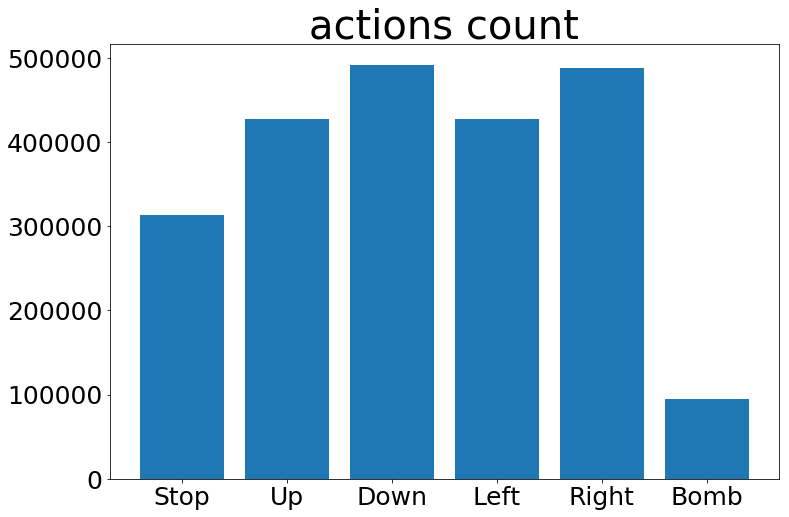

In [28]:
fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 25})

#plt.figure(figsize=(17,10))
plt.bar(range(0,6), actions_count)

plt.xticks(np.arange(6), ('Stop','Up','Down','Left','Right','Bomb'))
plt.title('actions count', fontsize=40)
plt.savefig('rand10kactions.png', dpi=fig.dpi)

plt.show()